<a href="https://colab.research.google.com/github/adityashroff06-code/Consumer-Segmentation-and-Purchase-Behavior-Analysis/blob/main/BWS_FInal_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BathSoapHousehold.csv to BathSoapHousehold.csv


In [ ]:

# Understand the Variables: Begin by thoroughly reviewing Table 21.8 to understand the meaning of each variable.  Pay close attention to the variable types (categorical, numerical) and their potential implications for your analysis.
# Check for Missing Values: Identify if there are any missing values in the dataset and determine how to handle them (e.g., imputation, removal).
# Descriptive Statistics: Calculate descriptive statistics (mean, median, standard deviation, etc.) for numerical variables to understand their distribution and range.
# Categorical Variable Analysis: Analyze the frequency distribution of categorical variables to identify unique categories and potential inconsistencies.
# Identify Outliers: Look for outliers in the numerical variables that might skew your analysis.
# Correlation Analysis: Explore correlations between variables to understand potential relationships and dependencies.

import pandas as pd
import io


try:
  df = pd.read_csv(io.BytesIO(uploaded['BathSoapHousehold.csv']))
except KeyError:
  print("Error: Please upload a file named 'your_file.csv'")
  exit()


# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Descriptive statistics for numerical variables
print("\nDescriptive Statistics:\n", df.describe())

# Analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  print(f"\nFrequency Distribution for {col}:\n", df[col].value_counts())

# Identify outliers (example using IQR for numerical columns)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers for {col}:\n", outliers)





Missing Values:
 Member id                0
SEC                      0
FEH                      0
MT                       0
SEX                      0
AGE                      0
EDU                      0
HS                       0
CHILD                    0
CS                       0
Affluence Index          0
No. of Brands            0
Brand Runs               0
Total Volume             0
No. of  Trans            0
Value                    0
Trans / Brand Runs       0
Vol/Tran                 0
Avg. Price               0
Pur Vol No Promo - %     0
Pur Vol Promo 6 %        0
Pur Vol Other Promo %    0
Br. Cd. 57, 144          0
Br. Cd. 55               0
Br. Cd. 272              0
Br. Cd. 286              0
Br. Cd. 24               0
Br. Cd. 481              0
Br. Cd. 352              0
Br. Cd. 5                0
Others 999               0
Pr Cat 1                 0
Pr Cat 2                 0
Pr Cat 3                 0
Pr Cat 4                 0
PropCat 5                0
PropCat 6  

In [ ]:
# Select features for clustering (purchase behavior and basis for purchase)
# Use exact column names as they appear in the dataset
cluster_features = [
    'No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value',
    'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ',  # Note the space after "Price"
    'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %'
]

In [ ]:
# Subset the data with selected features
# Replace 'data' with 'df', which holds your DataFrame
X = df[cluster_features]

# Normalize the features
# Make sure to import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

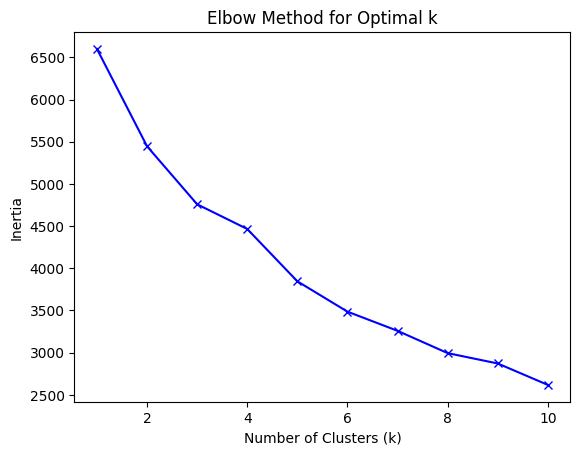

In [ ]:
#determine optimal number of clusters using elbow method

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate inertia for different k values
inertia = []
k_values = range(1, 11)  # Test k values from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)  # Set random_state for reproducibility
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


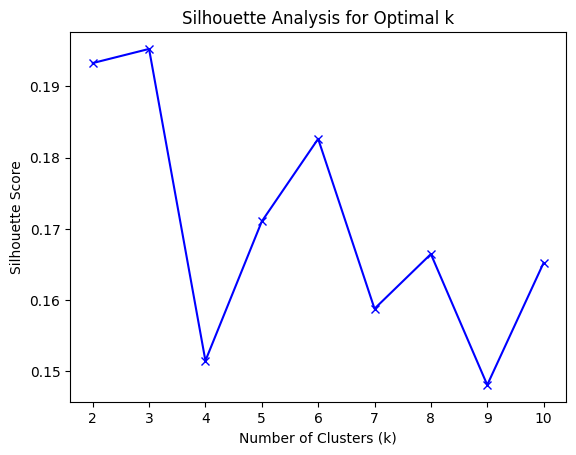

In [ ]:
 #Plot Silhouette Scores

from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different k values
silhouette_scores = []
# Start k_values from 2 to ensure at least 2 clusters for silhouette score calculation
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, 'bx-')  # Update x-axis values to match k_values
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

In [ ]:
# prompt: Based on elbow curve, let's choose k=4 and add cluster labels to original dataset

# Assuming k=4 is chosen based on the elbow and silhouette analysis

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)
df['cluster_label'] = kmeans.labels_
print(df.head())


   Member id  SEC  FEH  MT  SEX  AGE  EDU  HS  CHILD  CS  ...  PropCat 7  \
0    1010010    4    3  10    1    4    4   2      4   1  ...   0.000000   
1    1010020    3    2  10    2    2    4   4      2   1  ...   0.026834   
2    1014020    2    3  10    2    4    5   6      4   1  ...   0.033550   
3    1014030    4    0   0    0    4    0   0      5   0  ...   0.000000   
4    1014190    4    1  10    2    3    4   4      3   1  ...   0.000000   

   PropCat 8  PropCat 9  PropCat 10  PropCat 11  PropCat 12  PropCat 13  \
0   0.000000   0.000000         0.0    0.000000    0.028037         0.0   
1   0.016100   0.014311         0.0    0.059034    0.000000         0.0   
2   0.010823   0.008658         0.0    0.000000    0.016234         0.0   
3   0.000000   0.000000         0.0    0.000000    0.000000         0.0   
4   0.048193   0.000000         0.0    0.000000    0.000000         0.0   

   PropCat 14  PropCat 15  cluster_label  
0    0.130841    0.339564              2  
1    0

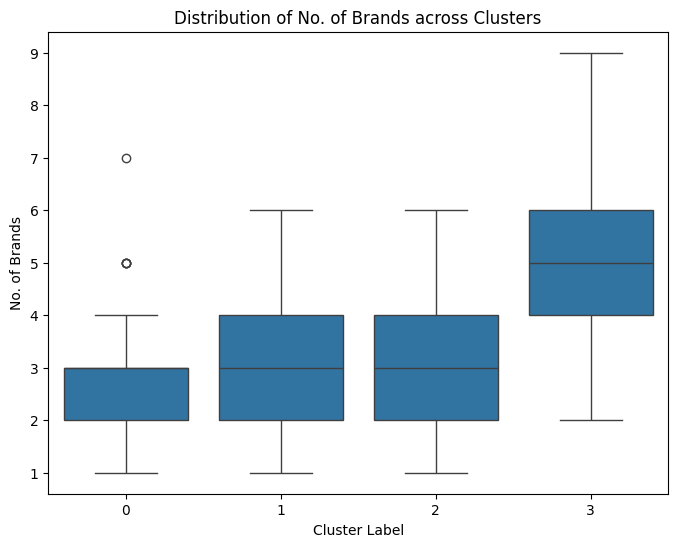

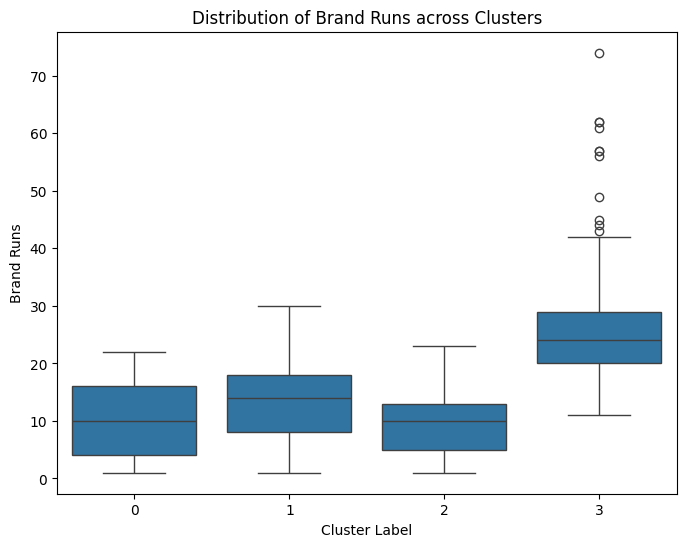

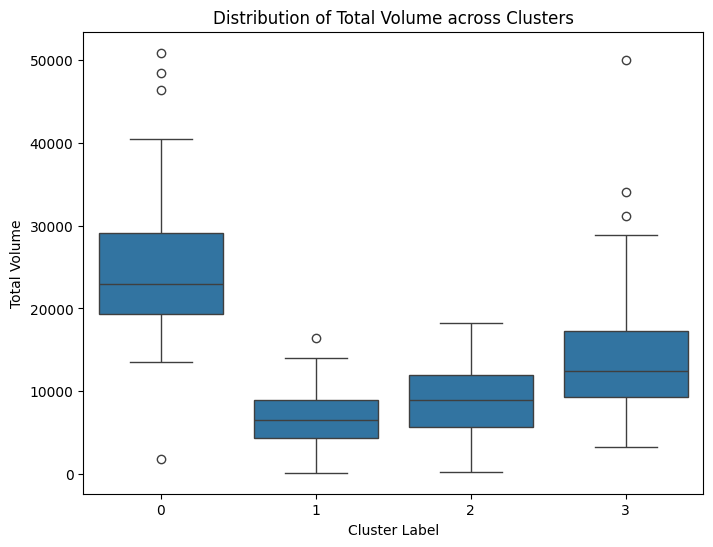

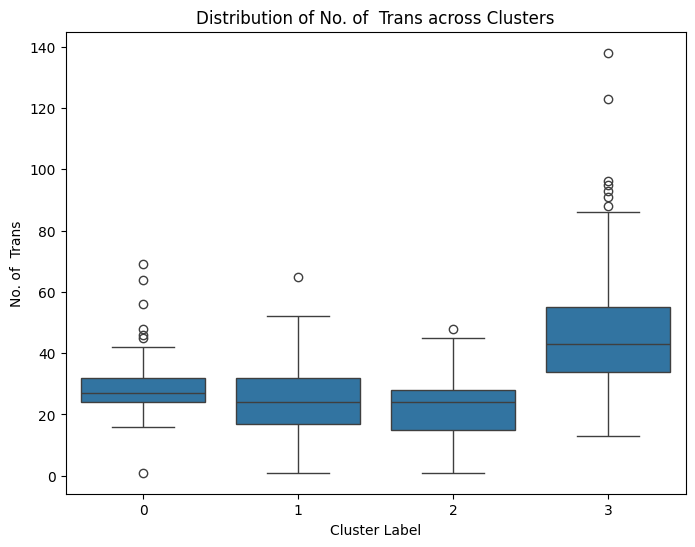

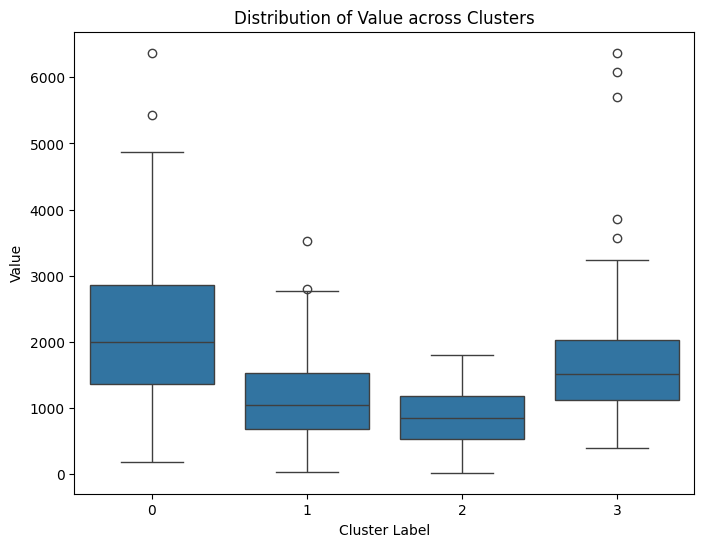

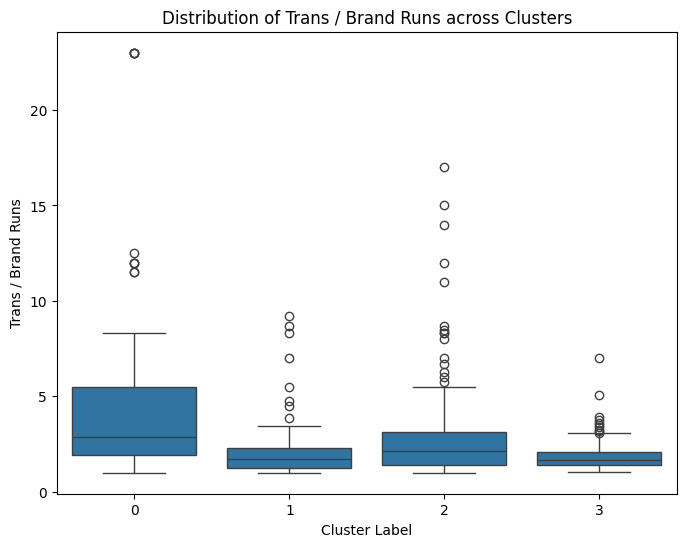

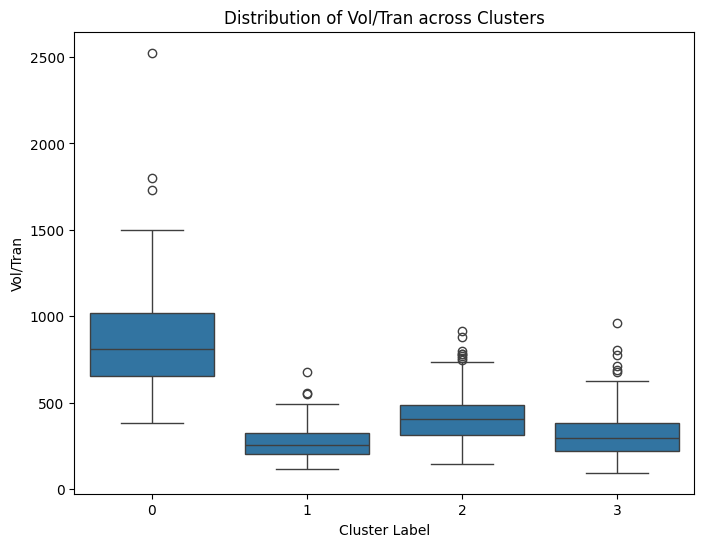

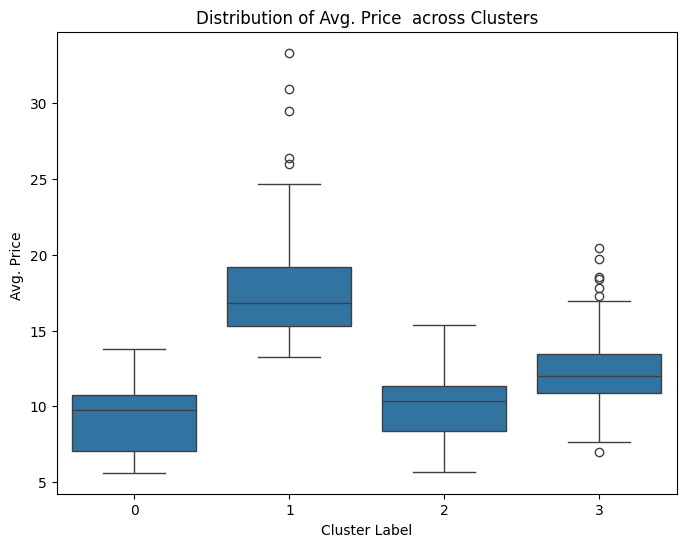

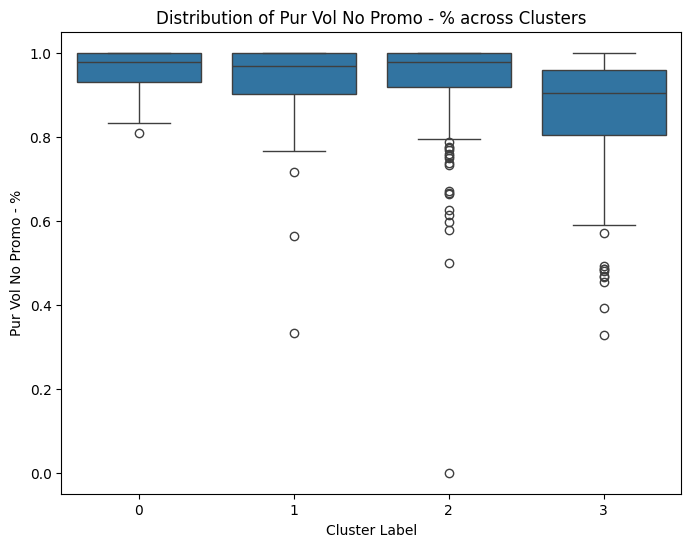

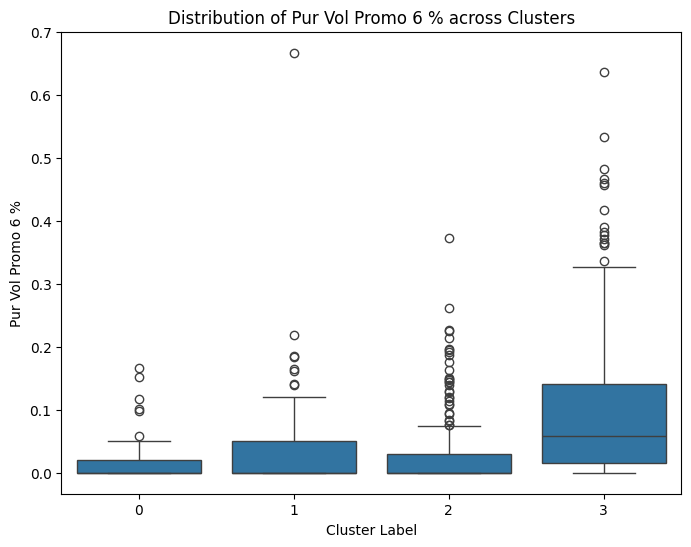

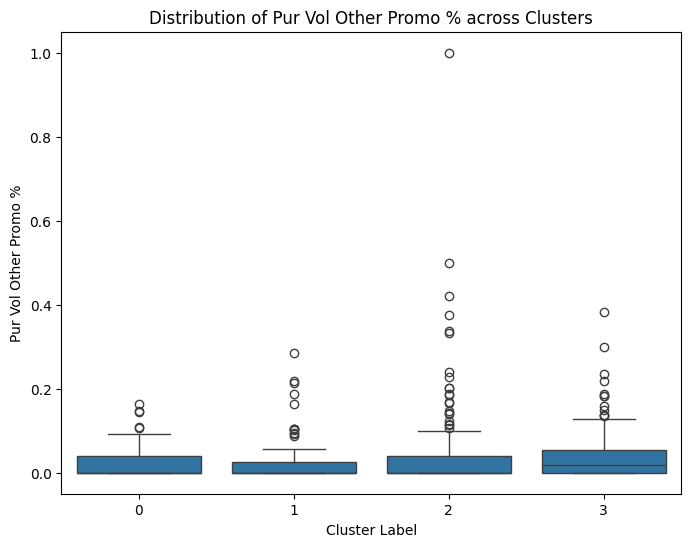

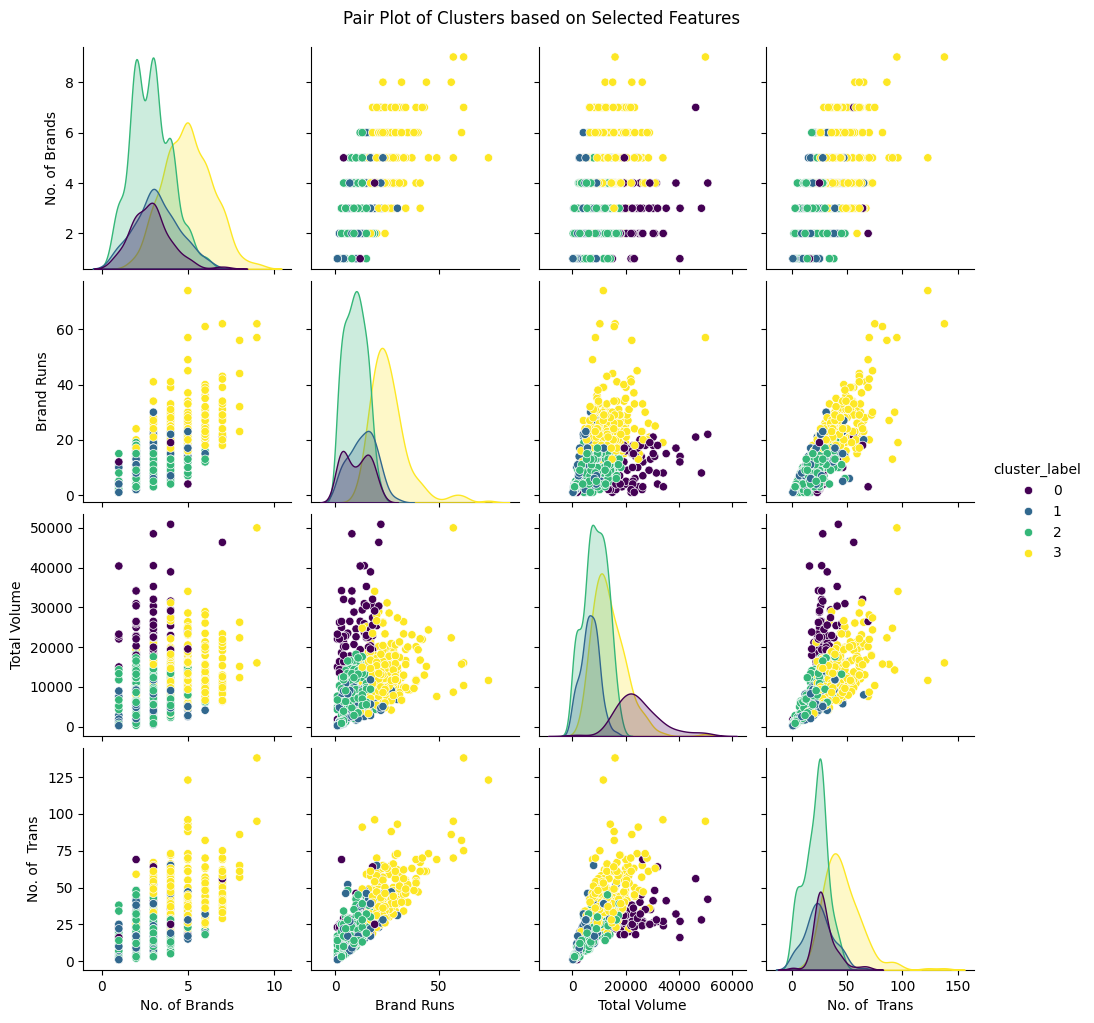


Cluster Centroids:
   No. of Brands  Brand Runs  Total Volume  No. of  Trans        Value  \
0       2.840580   10.130435  24670.362319      29.550725  2296.515942   
1       3.200000   13.115789   6490.631579      24.578947  1146.995789   
2       2.858369    9.609442   8595.901288      21.527897   845.223605   
3       5.004926   25.945813  13926.857143      45.822660  1665.372217   

   Trans / Brand Runs    Vol/Tran  Avg. Price   Pur Vol No Promo - %  \
0            5.193623  893.223188     9.064203              0.957658   
1            2.126947  277.479789    17.692316              0.937160   
2            2.729571  412.538927     9.967210              0.936878   
3            1.843645  319.784138    12.178670              0.859131   

   Pur Vol Promo 6 %  Pur Vol Other Promo %  
0           0.018051               0.024291  
1           0.037834               0.025006  
2           0.026889               0.036233  
3           0.103425               0.037444  

Cluster Profiles 

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,1.074234e+06,3.000000,2.623188,10.159420,1.956522,3.376812,3.623188,5.985507,3.014493,1.101449,...,0.055349,0.090976,0.016357,0.018134,0.003143,0.023543,0.002050,0.000896,0.315084,0.015636
1,1.125604e+06,1.800000,1.715789,6.968421,1.568421,3.105263,4.473684,3.021053,3.463158,0.778947,...,0.139900,0.070475,0.155834,0.014150,0.072031,0.016888,0.018789,0.105237,0.010955,0.013772
2,1.097951e+06,2.759657,1.892704,7.626609,1.600858,3.128755,3.454936,3.665236,3.403433,0.884120,...,0.071665,0.104668,0.042479,0.026423,0.005005,0.029476,0.001969,0.002462,0.193521,0.022811
3,1.111505e+06,2.359606,2.187192,8.704433,1.901478,3.305419,4.660099,4.733990,3.004926,1.000000,...,0.106338,0.102391,0.109649,0.047938,0.019325,0.037063,0.006627,0.021328,0.069047,0.037127


In [ ]:
# prompt: Interpret Cluster Characteristics and visualize cluster differences (label the graphs properly)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and kmeans are already defined from the previous code

# Visualize cluster characteristics
for col in cluster_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster_label', y=col, data=df)
    plt.title(f'Distribution of {col} across Clusters')
    plt.xlabel('Cluster Label')
    plt.ylabel(col)
    plt.show()


# Visualize cluster differences using pair plots (example with first 4 features)
selected_features = cluster_features[:4]
sns.pairplot(df, hue='cluster_label', vars=selected_features, palette='viridis')
plt.suptitle('Pair Plot of Clusters based on Selected Features', y=1.02)
plt.show()


# Cluster centroid analysis (optional but provides further insights)
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=cluster_features)
print("\nCluster Centroids:")
print(centroids)


#Analyze cluster profiles
cluster_profiles = df.groupby('cluster_label').mean()
print("\nCluster Profiles (Mean values):")
cluster_profiles



Cluster Profiles (Mean values) after dropping member ID:
                  Member id       SEC       FEH         MT       SEX  \
cluster_label                                                          
0              1.074234e+06  3.000000  2.623188  10.159420  1.956522   
1              1.125604e+06  1.800000  1.715789   6.968421  1.568421   
2              1.097951e+06  2.759657  1.892704   7.626609  1.600858   
3              1.111505e+06  2.359606  2.187192   8.704433  1.901478   

                    AGE       EDU        HS     CHILD        CS  ...  \
cluster_label                                                    ...   
0              3.376812  3.623188  5.985507  3.014493  1.101449  ...   
1              3.105263  4.473684  3.021053  3.463158  0.778947  ...   
2              3.128755  3.454936  3.665236  3.403433  0.884120  ...   
3              3.305419  4.660099  4.733990  3.004926  1.000000  ...   

               PropCat 6  PropCat 7  PropCat 8  PropCat 9  PropCat 10  \
clu

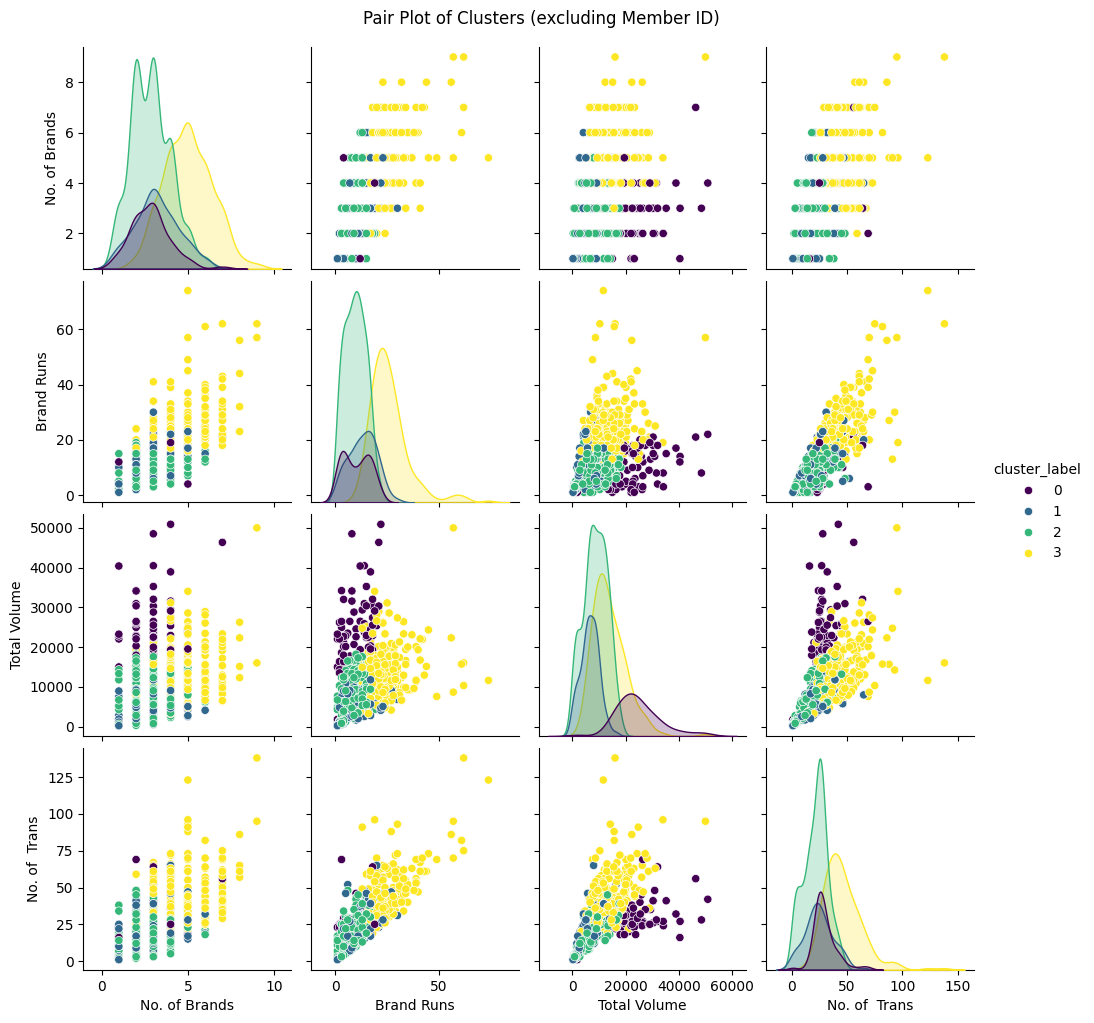

In [ ]:
# prompt: Interpret Cluster Characteristics (mean for each cluster) and visualize cluster difference (drop member id)

# Drop member ID if it exists
if 'Member' in df.columns:
    df = df.drop('Member', axis=1)

# Display cluster characteristics (mean for each cluster) after dropping member ID
cluster_profiles = df.groupby('cluster_label').mean()
print("\nCluster Profiles (Mean values) after dropping member ID:")
print(cluster_profiles)

# Visualize cluster differences using pair plots (excluding 'Member' if present)
selected_features = [col for col in cluster_features[:4] if col != 'Member']
sns.pairplot(df, hue='cluster_label', vars=selected_features, palette='viridis')
plt.suptitle('Pair Plot of Clusters (excluding Member ID)', y=1.02)
plt.show()


In [ ]:
# Classification Model
# Prepare features and target
X = df.select_dtypes(include=['number']).drop(columns=['cluster_label', 'Member id'])  # Select numeric features and drop 'cluster_label' and 'Member id'
y = df['cluster_label'].astype(int)  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression (Multinomial)
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train, y_train)
log_preds = log_reg.predict(X_test)

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_preds = tree_clf.predict(X_test)

# Evaluate both models
log_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, log_preds),
    "Classification Report": classification_report(y_test, log_preds, output_dict=True),
    "Confusion Matrix": confusion_matrix(y_test, log_preds)
}

tree_results = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, tree_preds),
    "Classification Report": classification_report(y_test, tree_preds, output_dict=True),
    "Confusion Matrix": confusion_matrix(y_test, tree_preds)
}

print("Logistic Regression Results:", log_results)
print("\nDecision Tree Results:", tree_results)

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        12
           1       0.14      0.09      0.11        22
           2       0.45      0.43      0.44        53
           3       0.31      0.45      0.37        33

    accuracy                           0.36       120
   macro avg       0.35      0.31      0.31       120
weighted avg       0.36      0.36      0.35       120



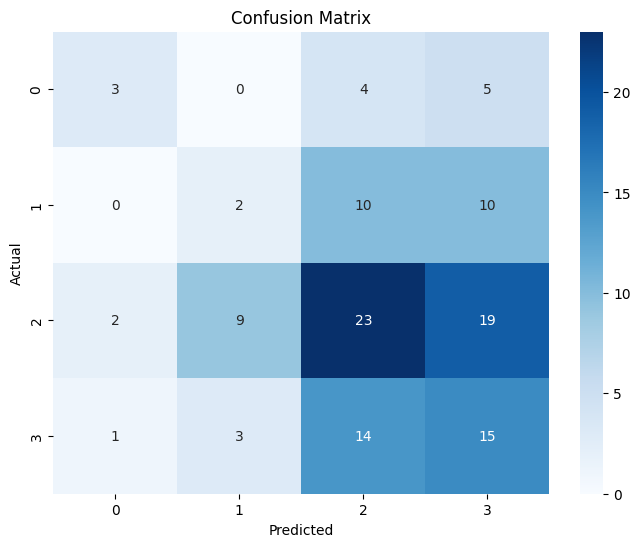

In [ ]:
# prompt: Do the demographic analysis with demographic features
# demographic features = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index']
# Develop a classification model
# Split the data
# Train a random forest classifier, predict and evaluate the classification report
# Give the confusion matrix

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'cluster_label' column
# from previous code

# Define demographic features
demographic_features = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index']

# Create X (features) and y (target variable)
X = df[demographic_features]
y = df['cluster_label']

# Handle missing values (e.g., imputation or removal)
X = X.fillna(X.mean())  # Example: Impute with mean

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(4), yticklabels=range(4))  # Assuming 4 clusters
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

# Evaluate Random Forest
rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, rf_preds),
    "Classification Report": classification_report(y_test, rf_preds, output_dict=True),
    "Confusion Matrix": confusion_matrix(y_test, rf_preds)
}

# Combine all model accuracies
model_accuracies = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [log_results["Accuracy"], tree_results["Accuracy"], rf_results["Accuracy"]]
})

# Bar chart of model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(data=model_accuracies, x="Model", y="Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot Random Forest confusion matrix
plot_conf_matrix(rf_results['Confusion Matrix'], "Random Forest")

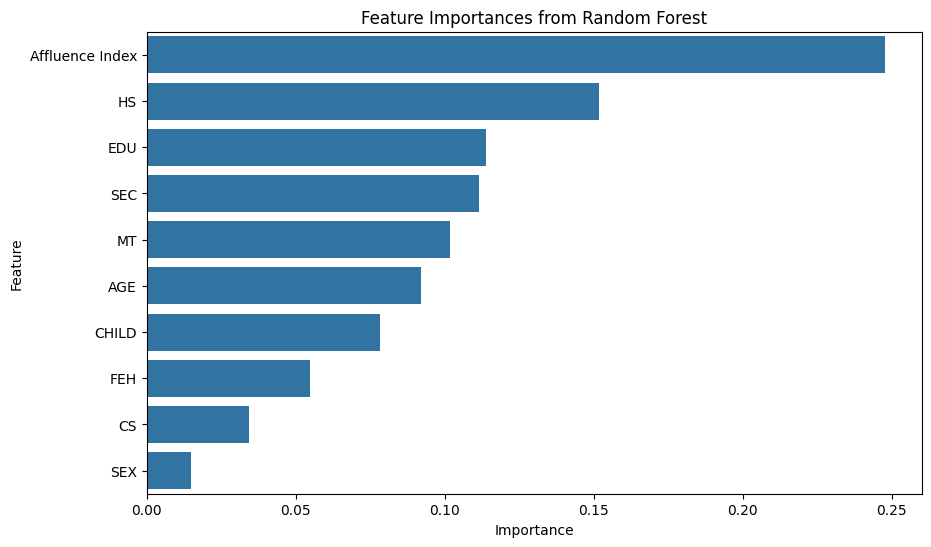

,Feature,Importance
9,Affluence Index,0.247632
6,HS,0.151570
5,EDU,0.113758
0,SEC,0.111319
2,MT,0.101658
4,AGE,0.091902
7,CHILD,0.078229
1,FEH,0.054763
8,CS,0.034299
3,SEX,0.014869


In [ ]:
# prompt: give a feature importance analysis

importances = rf_classifier.feature_importances_
feature_names = demographic_features

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

importance_df
